In [1]:
import FinanceDataReader as fdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = fdr.DataReader('086520', '2021-01-01', '2023-07-01')

df.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2023-06-26,759000,777000,758000,761000,368769,0.003958
2023-06-27,756000,760000,712000,738000,812930,-0.030223
2023-06-28,747000,752000,699000,700000,648809,-0.051491
2023-06-29,705000,735000,696000,714000,625782,0.020000
2023-06-30,726000,760000,715000,754000,668650,0.056022


In [3]:
df.shape

(617, 6)

In [4]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)

    return numerator / (denominator + 1e-7)

In [5]:
dfx = df[['Open', 'High', 'Low', 'Close', 'Volume']]
dfx = MinMaxScaler(dfx)

dfy = dfx[['Close']]
dfx = dfx[['Open', 'High', 'Low', 'Volume']]

dfx

,Open,High,Low,Volume
Date,,,,
2021-01-04,0.043032,0.042956,0.042551,0.252685
2021-01-05,0.044914,0.043116,0.044641,0.166713
2021-01-06,0.045344,0.042794,0.044641,0.133096
2021-01-07,0.046198,0.045207,0.046033,0.215839
2021-01-08,0.048767,0.047862,0.048905,0.218127
...,...,...,...,...
2023-06-26,0.984436,0.947561,1.000000,0.053683
2023-06-27,0.980545,0.926829,0.939314,0.118341
2023-06-28,0.968872,0.917073,0.922164,0.094449


In [6]:
dfx.describe()

,Open,High,Low,Volume
count,617.000000,617.000000,617.000000,617.000000
mean,0.196938,0.192419,0.194062,0.126813
std,0.227732,0.224077,0.222582,0.121733
min,0.000000,0.000000,0.000000,0.000000
25%,0.087432,0.085761,0.085599,0.053641
50%,0.122307,0.118251,0.121391,0.089322
75%,0.163813,0.158445,0.163061,0.162161
max,1.000000,1.000000,1.000000,1.000000


In [7]:
dfy.head()

,Close
Date,
2021-01-04,0.000715
2021-01-05,0.000179
2021-01-06,0.000000
2021-01-07,0.002593
2021-01-08,0.005279


In [8]:
time_step = 10
step = 1

def create_dataset(X, y, time_step, step):
    Xs, ys = [], []

    for i in range(0, len(X) - time_step, step):
        v = X.iloc[i : (i + time_step)].values
        labels = y.iloc[i + time_step]

        Xs.append(v)
        ys.append(labels)

    return np.array(Xs), np.array(ys)

In [9]:
X, y = create_dataset(dfx, dfy, time_step, step)

X.shape

(607, 10, 4)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((485, 10, 4), (122, 10, 4), (485, 1), (122, 1))

In [34]:
n_timesteps,n_features,n_outputs=X_train.shape[1],X_train.shape[2],y_train.shape[1]

In [35]:
n_timesteps, n_features, n_outputs

(10, 4, 1)

In [36]:
dfx.shape

(617, 4)

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout

In [49]:
model = Sequential([
    SimpleRNN(20, activation='relu', input_shape=(X.shape[1:]), return_sequences=True),
    Dropout(0.5),
    SimpleRNN(20, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_12 (SimpleRNN)   (None, 10, 20)            500       
                                                                 
 dropout_4 (Dropout)         (None, 10, 20)            0         
                                                                 
 simple_rnn_13 (SimpleRNN)   (None, 20)                820       
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,341
Trainable params: 1,341
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(loss='mse', optimizer='adam')

In [51]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

Epoch 1/100
16/16 [==============================] - 2s 41ms/step - loss: 0.0069 - val_loss: 0.3786
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0030 - val_loss: 0.3120
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0026 - val_loss: 0.2902
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0021 - val_loss: 0.2786
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 0.2651
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 0.2570
Epoch 7/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.2426
Epoch 8/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.2275
Epoch 9/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.2217
Epoch 10/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0013 - val_loss: 0.2164
Epoch 11

16/16 [==============================] - 0s 7ms/step - loss: 4.2803e-04 - val_loss: 0.0251
Epoch 81/100
16/16 [==============================] - 0s 6ms/step - loss: 3.9496e-04 - val_loss: 0.0223
Epoch 82/100
16/16 [==============================] - 0s 6ms/step - loss: 4.7038e-04 - val_loss: 0.0269
Epoch 83/100
16/16 [==============================] - 0s 7ms/step - loss: 3.9000e-04 - val_loss: 0.0227
Epoch 84/100
16/16 [==============================] - 0s 6ms/step - loss: 3.6715e-04 - val_loss: 0.0212
Epoch 85/100
16/16 [==============================] - 0s 7ms/step - loss: 4.2147e-04 - val_loss: 0.0221
Epoch 86/100
16/16 [==============================] - 0s 7ms/step - loss: 4.2133e-04 - val_loss: 0.0235
Epoch 87/100
16/16 [==============================] - 0s 7ms/step - loss: 3.9064e-04 - val_loss: 0.0244
Epoch 88/100
16/16 [==============================] - 0s 7ms/step - loss: 3.8246e-04 - val_loss: 0.0257
Epoch 89/100
16/16 [==============================] - 0s 7ms/step - loss: 3.8

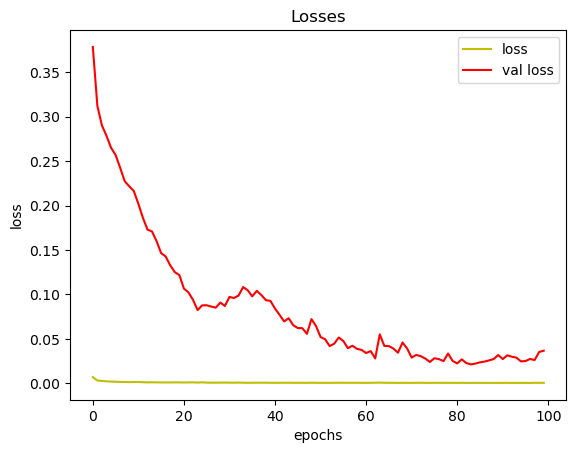

In [52]:
loss = history.history['loss']
val_loss = history.history['val_loss']

x = np.arange(0, len(history.history['loss']))

plt.plot(x, loss, 'y', label='loss')
plt.plot(x, val_loss, 'r', label='val loss')
plt.title('Losses')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [53]:
model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


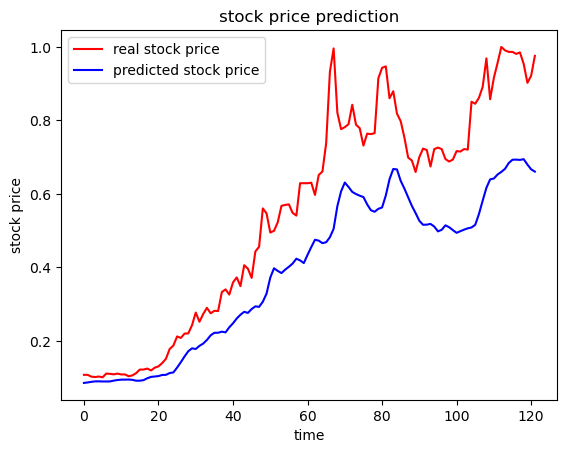

In [54]:
y_pred.shape

plt.plot(y_test, color='red', label='real stock price')
plt.plot(y_pred, color='blue', label='predicted stock price')
plt.title('stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()